In [120]:
import numdifftools as nd
import numpy as np

def f(x):
    #return 30 * x[0] - (2 * x[0] ** 2)
    return x[0] ** 2 + x[1] ** 2
def f2(x): #Função de exemplo do livro Programação Nao Linear
    return 30 * x[0] - (2 * x[0] ** 2)
#Teste 
x = np.array([10,10])
print(nd.Gradient(f)(x))

[20. 20.]


In [121]:
def g_descendent(x0, alpha, f, r):
    precisão = 0.0001 #Condição de parada
    max_iterações = 10000
    x_novo = x0
    res = []
    for i in range(max_iterações):
        x_ant = x_novo
        if r == "max": #Para maximização, fazemos o gradiente positivo
            #F(x+1) = F(x) + alpha * gradiente(F(x)
            x_novo = x_ant + alpha * nd.Gradient(f)(x_ant)
        if r == "min": #Para minimização, fazemos o gradiente negativo
            #F(x+1) = F(x) - alpha * gradiente(F(x)
            x_novo = x_ant - alpha * nd.Gradient(f)(x_ant)
        #Verificando se a imagem da função está convergindo
        f_x_novo = f(x_novo) #F(x+1)
        f_x_ant = f(x_ant) #F(x)
        res.append([x_novo, f_x_novo]) #Salvando os valores de x e f(x)
        if abs(f_x_novo - f_x_ant) < precisão: #Condição de parada
            print("Convergiu")
            return res, x_novo, f_x_novo
    print("Número de iterações maxima")
    return res, x_novo, f_x_novo
res,x ,fx = g_descendent(x, 0.001, f, "min")
print("x = ", x)
print("f(x) = ", fx)

Convergiu
x =  [0.11147968 0.11147968]
f(x) =  0.024855440169048042


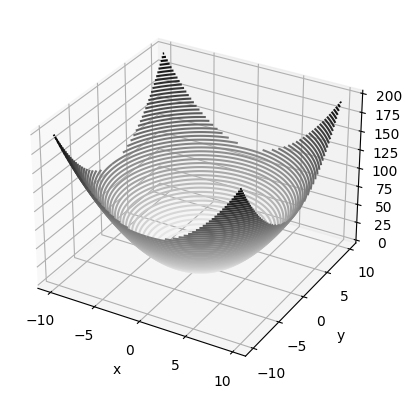

[[array([9.98, 9.98]), 199.20080000000002], [array([9.96004, 9.96004]), 198.40479360320003], [array([9.94011992, 9.94011992]), 197.61196804796165], [array([9.92023968, 9.92023968]), 196.82231062364195], [array([9.9003992, 9.9003992]), 196.03580867038986], [array([9.8805984, 9.8805984]), 195.252449578943], [array([9.86083721, 9.86083721]), 194.47222079042555], [array([9.84111553, 9.84111553]), 193.695109796147], [array([9.8214333, 9.8214333]), 192.92110413740164], [array([9.80179043, 9.80179043]), 192.15019140526857], [array([9.78218685, 9.78218685]), 191.38235924041308], [array([9.76262248, 9.76262248]), 190.61759533288836], [array([9.74309723, 9.74309723]), 189.85588742193815], [array([9.72361104, 9.72361104]), 189.0972232958001], [array([9.70416382, 9.70416382]), 188.34159079151007], [array([9.68475549, 9.68475549]), 187.58897779470718], [array([9.66538598, 9.66538598]), 186.8393722394395], [array([9.64605521, 9.64605521]), 186.0927621079707], [array([9.6267631, 9.6267631]), 185.3491

In [122]:
def plot2():
    x = np.arange(-10, 10, 0.1)
    y = np.arange(-10, 10, 0.1)
    X, Y = np.meshgrid(x, y)
    Z = X ** 2 + Y ** 2
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, Z, 50, cmap='binary')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

plot2()
print(res)


In [138]:
def tratarRes(res):
    x = []
    y = []
    z = []
    for i in range(len(res)):
        x.append(res[i][0][0])
        y.append(res[i][0][1])
        z.append(res[i][1])
    return x, y, z
X,Y,Z= tratarRes(res)
print(X)
print(Y)
print(Z)

[9.98, 9.960040000000001, 9.94011992, 9.92023968016, 9.90039920079968, 9.88059840239808, 9.860837205593285, 9.841115531182098, 9.821433300119734, 9.801790433519495, 9.782186852652455, 9.762622478947149, 9.743097233989255, 9.723611039521277, 9.704163817442234, 9.68475548980735, 9.665385978827734, 9.646055206870079, 9.626763096456338, 9.607509570263426, 9.5882945511229, 9.569117962020654, 9.549979726096613, 9.53087976664442, 9.511818007111131, 9.49279437109691, 9.473808782354716, 9.454861164790007, 9.435951442460427, 9.417079539575505, 9.398245380496354, 9.379448889735361, 9.36068999195589, 9.341968611971978, 9.323284674748034, 9.304638105398539, 9.28602882918774, 9.267456771529366, 9.248921857986307, 9.230424014270335, 9.211963166241794, 9.193539239909311, 9.175152161429493, 9.156801857106634, 9.13848825339242, 9.120211276885636, 9.101970854331864, 9.083766912623199, 9.065599378797952, 9.047468180040356, 9.029373243680276, 9.011314497192915, 8.99329186819853, 8.975305284462133, 8.957354

In [137]:
x2 = np.array([-10,-10])
res2, xf2, fx2 = g_descendent(x2, 0.001, f, "min")
X2, Y2, Z2 = tratarRes(res2)
X = np.union1d(X, X2)
Y = np.union1d(Y, Y2)
Z = np.union1d(Z, Z2)



Convergiu
2246


In [133]:
print(X.shape)
print(Y.shape)
print(Z.shape)

(4492,)
(4492,)
(2246,)


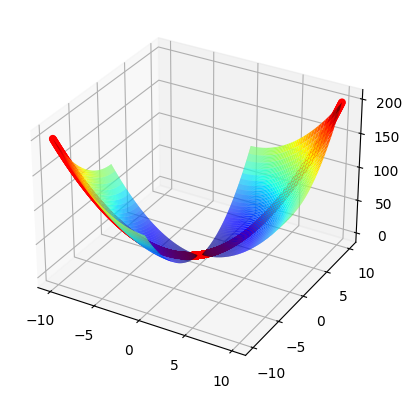

In [151]:
#Plotar a linha de descida do gradiente em 3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def plot3(x,y,z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(x, y)
    Z = X ** 2 + Y ** 2
    ax.plot_surface(X, Y, Z, rcount=100, ccount=100, cmap='jet', edgecolor='none')
    Xx, Yy = np.meshgrid(X2, Y2)
    Zz = Xx ** 2 + Yy ** 2
    ax.plot_surface(Xx, Yy, Zz, rcount=100, ccount=100, cmap='jet', edgecolor='none')
    ax.scatter(x, y, z, c='r', marker='o')
    ax.scatter(X2, Y2, Z2, c='r', marker='o')
plot3(X,Y,Z)


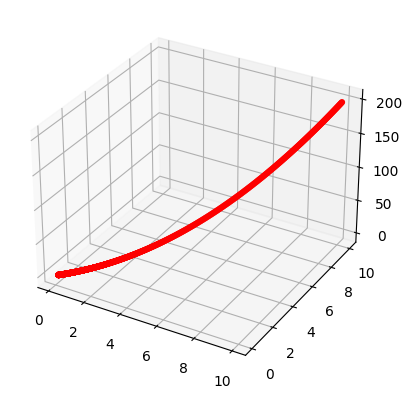

In [145]:
def scatterplot(x,y,z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c='r', marker='o')
scatterplot(X,Y,Z)
    

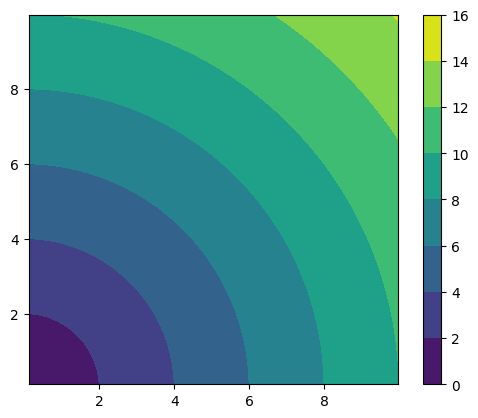

In [148]:
def meshgridplot(x,y,z): 
    xx, yy = np.meshgrid(x, y)
    zz = np.sqrt(xx ** 2 + yy ** 2)
    fig = plt.figure()
    xs, ys = np.meshgrid(x, y, sparse=True)
    zs = np.sqrt(xs ** 2 + ys ** 2)
    h = plt.contourf(xx,yy,zs)
    plt.axis('scaled')
    plt.colorbar(h)
    plt.show()
meshgridplot(X,Y,Z)

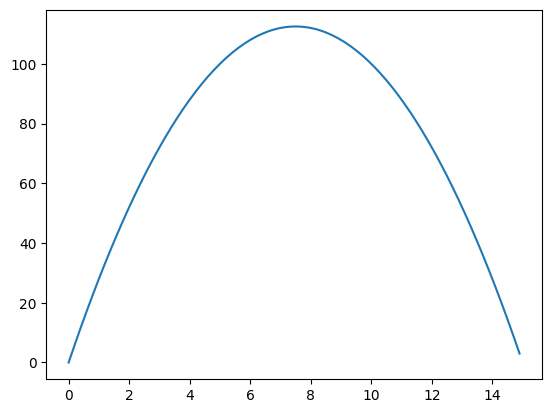

In [65]:
import matplotlib.pyplot as plt

#Plot do exemplo da nota de Programação Nao Linear
def plotar_grafico():
    x = np.arange(0, 15, 0.1)
    y = 30 * x - (2 * x ** 2)
    plt.plot(x, y)

plotar_grafico()
plt.show()

Convergiu
Convergiu


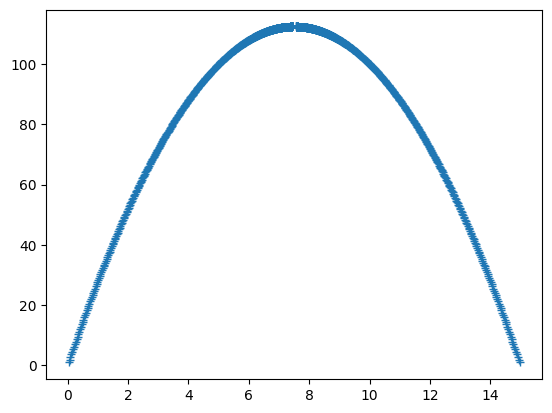

([[array([14.97]), 0.8981999999999744], [array([14.94012]), 1.789228771199987], [array([14.91035952]), 2.6731435686907616], [array([14.88071808]), 3.5500011904383086], [array([14.85119521]), 4.419857980933841], [array([14.82179043]), 5.282769834814076], [array([14.79250327]), 6.13879220045294], [array([14.76333325]), 6.987980083524519], [array([14.73427992]), 7.830388050537692], [array([14.7053428]), 8.666070232342122], [array([14.67652143]), 9.495080327607127], [array([14.64781534]), 10.317471606271567], [array([14.61922408]), 11.133296912967069], [array([14.59074719]), 11.94260867041396], [array([14.5623842]), 12.745458882789421], [array([14.53413466]), 13.541899139069187], [array([14.50599812]), 14.331980616342832], [array([14.47797413]), 15.115754083101933], [array([14.45006223]), 15.893269902502482], [array([14.42226198]), 16.66457803560087], [array([14.39457294]), 17.429728044564683], [array([14.36699464]), 18.188769095856856], [array([14.33952667]), 18.941749963395523], [array([

In [108]:

x = np.array([15])
res = g_descendent(x, 0.001, f2, "max")
x2 = np.array([0])
res2 = g_descendent(x2, 0.001, f2, "max")
def plot_grad_f2():
    x = []
    y = []
    for i in range(len(res[0])):
        x.append(res[0][i][0])
        x.append(res2[0][i][0])
        y.append(res[0][i][1])
        y.append(res2[0][i][1])
    plt.plot(x, y, '+')
    plt.show()
plot_grad_f2()


In [11]:
def rosenbrock_2d(x):
    return 100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2
x = np.array([1,-1])
res, x, fx = g_descendent(x, 0.0001, rosenbrock_2d, "min")
print("x = ", x)
print("f(x) = ", fx)
print(res)



Convergiu
x =  [0.37511508 0.13770498]
f(x) =  0.3913849714680053
[[array([ 0.92, -0.96]), 326.31449599999996], [array([ 0.85354048, -0.923872  ]), 273.0651338301489], [array([ 0.79715405, -0.89082393]), 232.99375424492243], [array([ 0.74852745, -0.86029836]), 201.871318744563], [array([ 0.70604367, -0.83188653]), 177.07862051847079], [array([ 0.66853009, -0.80527884]), 156.9131922159353], [array([ 0.63511074, -0.78023462]), 140.22410548327835], [array([ 0.60511503, -0.75656261]), 126.20748422647036], [array([ 0.57801885, -0.73410808]), 114.28615578951485], [array([ 0.55340534, -0.7127438 ]), 104.03580551547206], [array([ 0.53093783, -0.69236377]), 95.13803094638457], [array([ 0.51034081, -0.6728786 ]), 87.34957173653576], [array([ 0.49138616, -0.65421207]), 80.48159818592403], [array([ 0.47388304, -0.63629862]), 74.38544035381005], [array([ 0.45767031, -0.61908135]), 68.94254886984601], [array([ 0.44261079, -0.60251048]), 64.05730058295343], [array([ 0.42858679, -0.58654218]), 59.6517